In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/anaconda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [12]:
import numpy as np
from scipy.misc import imread, imsave, toimage, fromimage
from PIL import Image, ImageOps

In [22]:
BASE = '../GatoPerro/train'
WIDTH = HEIGHT = 224
def load_and_crop_image(filename, target_size):
    return ImageOps.fit(Image.open(filename), target_size)
gatos = np.array([fromimage(load_and_crop_image(BASE+'/cat.{:04}.jpg'.format(i), (WIDTH, HEIGHT))) for i in range(100)])
perros = np.array([fromimage(load_and_crop_image(BASE+'/dog.{:04}.jpg'.format(i), (WIDTH, HEIGHT))) for i in range(100)])

In [23]:
imagenes = np.concatenate((gatos, perros), axis=0)
labels = np.zeros(len(gatos) + len(perros), dtype=int)
labels[:len(gatos)] = 1

In [24]:
brightness = np.mean(imagenes, axis=(1,2,3))

In [25]:
bright_dogs = np.flatnonzero((brightness > 150) & (labels == 0))
dark_cats = np.flatnonzero((brightness < 100) & (labels == 1))

In [26]:
len(bright_dogs), len(dark_cats)

(4, 35)

In [4]:
%run vgg16.py

Model loaded.


In [9]:
model.build()

In [125]:
VGG_MEAN_PIXEL = np.array([103.939, 116.779, 123.68])
def img_to_vgg_input(img):
    return imgs_to_vgg_input(np.expand_dims(img, axis=0))

def imgs_to_vgg_input(imgs):
    assert imgs.shape[-1] == 3
    imgs = imgs[..., [2,1,0]]
    imgs = imgs - VGG_MEAN_PIXEL
    return imgs.transpose((0, 3, 1, 2))

In [126]:
pred = model.predict(img_to_vgg_input(imagenes[0]))

In [127]:
preds = model.predict(imgs_to_vgg_input(imagenes))

In [83]:
model.model.inputs

[zeropadding2d_input_2]

In [78]:
from keras import backend as K

In [98]:
layer_dict

{'conv1_1': <keras.layers.convolutional.Convolution2D at 0x7fba45ad7978>,
 'conv1_2': <keras.layers.convolutional.Convolution2D at 0x7fba45aea828>,
 'conv2_1': <keras.layers.convolutional.Convolution2D at 0x7fba45a7e630>,
 'conv2_2': <keras.layers.convolutional.Convolution2D at 0x7fba45a92080>,
 'conv3_1': <keras.layers.convolutional.Convolution2D at 0x7fba45a8a358>,
 'conv3_2': <keras.layers.convolutional.Convolution2D at 0x7fba45aabf98>,
 'conv3_3': <keras.layers.convolutional.Convolution2D at 0x7fba45a3cba8>,
 'conv4_1': <keras.layers.convolutional.Convolution2D at 0x7fba45a527f0>,
 'conv4_2': <keras.layers.convolutional.Convolution2D at 0x7fba45a52e48>,
 'conv4_3': <keras.layers.convolutional.Convolution2D at 0x7fba459f5710>,
 'conv5_1': <keras.layers.convolutional.Convolution2D at 0x7fba45a06518>,
 'conv5_2': <keras.layers.convolutional.Convolution2D at 0x7fba45a16f28>,
 'conv5_3': <keras.layers.convolutional.Convolution2D at 0x7fba45a16198>,
 'dense_4': <keras.layers.core.Dense a

In [169]:
# Learning phase: False = test, True = train
all_layer_outputs = K.function(
    [model.input],
    [layer.output for layer in model.layers if layer.name.startswith('conv') or layer.name.startswith('pool')])
#([img_to_vgg_input(imagenes[0]), False])[0]
#pred2 = K.function([model.input] + [K.learning_phase()], [model.layers[-1].output])([img_to_vgg_input(imagenes[0]), False])[0]

In [171]:
alls = all_layer_outputs([img_to_vgg_input(imagenes[0])])

In [172]:
len(alls)

18

In [174]:
alls[-1].shape

(1, 512, 7, 7)

In [102]:
conv1_out = K.function([model.input], [layer_dict['conv1_1'].output])

In [175]:
conv5_out = K.function([model.input], [layer_dict['conv5_3'].output])

In [162]:
conv1_1 = layer_dict['conv1_1']

In [166]:
K.get_value(conv1_1.b)

array([ 0.73429835,  0.09340367,  0.06775674,  0.88629657,  0.25994542,
        0.66426694, -0.01582893,  0.3249065 ,  0.68600726,  0.06247932,
        0.58156496,  0.23614749,  0.69694996,  0.19451167,  0.48589221,
        0.44571847,  0.51134223,  0.20857599,  0.57557714,  0.33199573,
        0.4997983 ,  0.7117759 ,  0.30284074,  0.70827121,  0.04548979,
        0.74465019,  0.29845494,  0.48211655,  0.81658626,  0.62603897,
        0.3768093 ,  2.06403708,  0.77311045,  0.3459577 ,  0.61309582,
        0.65459156,  0.39045632,  0.50869167,  0.2625384 ,  0.23669638,
        0.07971057,  1.1179353 ,  0.26129362,  0.8697589 ,  0.21543622,
        0.78007823,  0.37015367,  0.47993386,  0.4313978 ,  0.50841939,
        0.23049663,  0.76365268,  0.35419866,  0.45794216,  0.46625951,
        0.09850298,  0.3803252 ,  0.66880196,  0.4015123 ,  0.90510356,
        0.43166816,  1.30201399,  0.53068852,  0.48993504], dtype=float32)

In [167]:
K.conv2d??

In [111]:
c1 = conv1_out([img_to_vgg_input(imagenes[0])])[0][0]

In [113]:
c1.shape

(64, 224, 224)

In [192]:
img = toimage(imagenes[0])

In [205]:
from io import BytesIO
import base64

def img_to_data_uri(img):
    x = BytesIO()
    img.save(x, 'png')
    return 'data:image/png;base64,{}'.format(base64.b64encode(x.getvalue()).decode('latin1'))


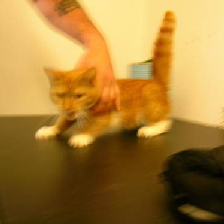

In [207]:
from IPython.display import HTML
HTML('<img src="{}">'.format(img_to_data_uri(img)))

In [213]:
HTML(''.join('<img style="display: inline; width: 64px" src="{}">'.format(img_to_data_uri(toimage(img))) for img in c5_3[0][0]))

In [176]:
c5_3 = conv5_out([imgs_to_vgg_input(imagenes[:5])])

In [ ]:
PIL

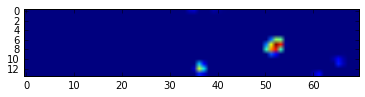

In [191]:
plt.imshow(np.concatenate(c5_3[0][:,0], axis=1))

In [43]:
import nltk; nltk.download("punkt"); nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [40]:
synsets = [line.strip().split(' ', 1) for line in open(BASE_PATH + '/../synset_words.txt')]

In [44]:
from nltk.corpus import wordnet

In [47]:
root_dog = wordnet.synsets('dog', 'n')[0]
root_dog.definition()

'a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds'

In [57]:
root_cat = wordnet.synsets('cat', 'n')[0]
root_cat.definition()

'feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats'

In [58]:
def get_synset(imagenet_synset_id):
    return wordnet.of2ss(imagenet_synset_id[1:] + 'n')
def is_a(leaf, root):
    return any(root in path for path in leaf.hypernym_paths())
def get_all_leaf_indices(root):
    return [i for i, (ssid, words) in enumerate(synsets) if is_a(get_synset(ssid), root)]
all_dogs = get_all_leaf_indices(root_dog)
len(all_dogs)

118

In [59]:
all_cats = get_all_leaf_indices(root_cat)
len(all_cats)

7

In [60]:
[synsets[i] for i in all_cats]

[['n02123045', 'tabby, tabby cat'],
 ['n02123159', 'tiger cat'],
 ['n02123394', 'Persian cat'],
 ['n02123597', 'Siamese cat, Siamese'],
 ['n02124075', 'Egyptian cat'],
 ['n02125311',
  'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'],
 ['n02127052', 'lynx, catamount']]

In [132]:
cat_probs = np.sum(preds[:,all_cats], axis=1)
dog_probs = np.sum(preds[:,all_dogs], axis=1)

In [133]:
np.sum(pred[0][all_cats]), np.sum(pred[0][all_dogs])

(0.29949783957272302, 0.11149249981374965)

In [73]:
[synsets[i] for i in np.argsort(pred[0])[::-1][:5]]

[['n02124075', 'Egyptian cat'],
 ['n02123159', 'tiger cat'],
 ['n02123045', 'tabby, tabby cat'],
 ['n02808440', 'bathtub, bathing tub, bath, tub'],
 ['n15075141', 'toilet tissue, toilet paper, bathroom tissue']]

In [71]:
synsets[285]

['n02124075', 'Egyptian cat']

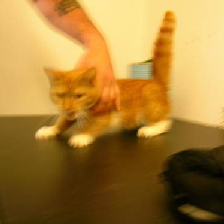

In [74]:
toimage(imagenes[0])

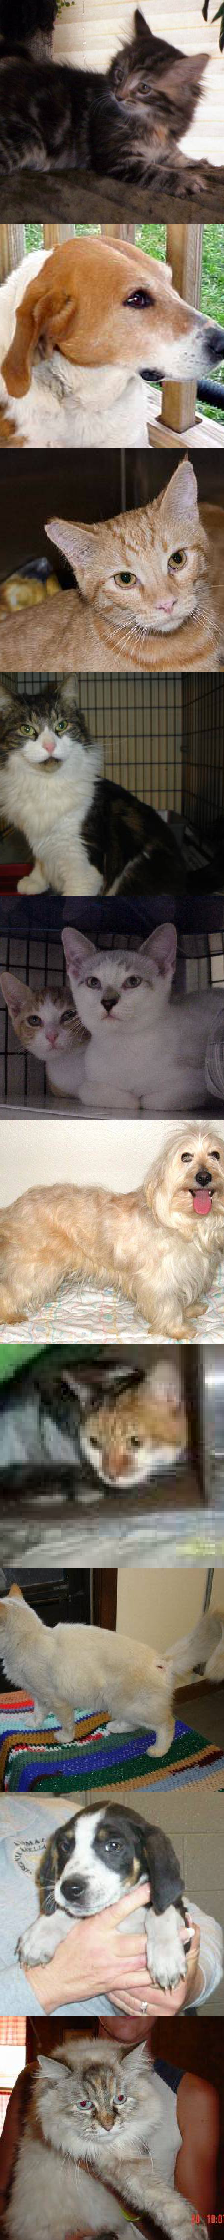

In [154]:
np.random.seed(3)
dog_images = np.random.choice(bright_dogs, 3, replace=False)
cat_images = np.random.choice(dark_cats, 7, replace=False)
first_set_of_images = np.concatenate((dog_images, cat_images))
np.random.shuffle(first_set_of_images)
np.random.shuffle(first_set_of_images)
toimage(np.concatenate(imagenes[first_set_of_images], axis=0))

In [135]:
%pwd

'/workspace/notebooks'

In [157]:
feats = []
true = []
for i, idx in enumerate(first_set_of_images):
    imsave('img_{:02}.jpg'.format(i), imagenes[idx])
    # labels[idx] - .5 + np.random.standard_normal()*.1, 
    feats.append([1, cat_probs[idx], brightness[idx]])
    true.append(labels[idx])
true = np.array(true)
feats = np.array(feats)
true == (feats[:, 1] > .01)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [160]:
with open('page.html','w') as f:
    print('''<style>
        div { page-break-after: always; }
        table { border-collapse: collapse; margin: 5px; }
        td { border: 1px solid black; padding: 5px; }
    </style>''', file=f)
    for i, feat in enumerate(feats):
        print('<div>', file=f)
        print('<h1>{}</h1>'.format(i+1), file=f)
        print('<img src="img_{:02}.jpg">'.format(i), file=f)
        print(
            '<table><tr>',
            ''.join('<td>{:.02f}</td>'.format(f) for f in feat),
            '</tr><tr>',
            ''.join(['<td>&nbsp;</td>'] * len(feat)),
            '</tr><tr>',
            ''.join(['<td>&nbsp;</td>'] * len(feat)),
            '</tr></table>', file=f)
        print('</div>', file=f)

In [129]:
import pandas as pd

In [130]:
#weights = np.array([100, 1., -1.])
weights = np.array([-1, 0, 0])
weights = np.array([-1, 0, 1])
predicted = np.dot(feats, weights)
pd.DataFrame.from_items([
        ('true', true),
        ('predicted', predicted),
        ('correct', true == (predicted > 0))])

,true,predicted,correct
0,1,83.346161,True
1,1,93.676941,True
2,0,153.467489,False
3,1,98.896866,True
4,1,89.513056,True
5,1,57.779139,True
6,1,62.366948,True
7,0,158.755000,False
8,1,89.102661,True
9,0,153.264191,False
